# 0. Install and Import dependencies

### Explication des installations :
- **numpy, pandas** : Manipulation de données et calculs numériques
- **matplotlib, seaborn** : Création de graphiques
- **gym** : Framework pour créer des environnements de RL (Reinforcement Learning)
- **stable-baselines3** : Algorithmes de RL pré-implémentés (A2C, PPO, etc.)
- **gym-anytrading** : Environnement spécifique pour le trading de stocks

In [ ]:
#!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym


^C


In [1]:
!pip install numpy pandas matplotlib seaborn
!pip install gym==0.26.2
!pip install stable-baselines3
!pip install gym-anytrading

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-wi

In [ ]:
!pip install stable-baselines3 gym-anytrading matplotlib pandas numpy seaborn

In [ ]:
!pip install gym==0.26.2


In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


### Explication des imports :
```python
import gym, gym_anytrading  # Environnements de trading
from stable_baselines3.common.vec_env import DummyVecEnv  # Wrapper pour vectoriser l'environnement
from stable_baselines3 import A2C  # Algorithme Advantage Actor-Critic
import numpy as np  # Calculs numériques (arrays, matrices)
import pandas as pd  # Manipulation de données tabulaires (DataFrame)
from matplotlib import pyplot as plt  # Création de graphiques
import seaborn as sns  # Graphiques statistiques avancés
```

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [15]:
df = pd.read_csv('data/gmedata.csv')

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [17]:
# Après avoir chargé les données
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# Analyse du drawdown et de la performance
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# 1. Évolution du prix avec pics et creux
cummax = df['Close'].cummax()
axes[0].plot(df.index, df['Close'], label='Prix de Clôture', linewidth=2, color='steelblue')
axes[0].plot(df.index, cummax, label='Pics historiques', linewidth=2, linestyle='--', color='red', alpha=0.7)
axes[0].fill_between(df.index, df['Close'], cummax, alpha=0.2, color='red', label='Drawdown')
axes[0].set_ylabel('Prix ($)', fontsize=11)
axes[0].set_title('Prix et Pics Historiques', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 2. Drawdown (%)
drawdown = (df['Close'] - cummax) / cummax * 100
axes[1].fill_between(df.index, 0, drawdown, color='red', alpha=0.5)
axes[1].plot(df.index, drawdown, color='darkred', linewidth=1.5)
axes[1].axhline(drawdown.min(), color='black', linestyle='--', linewidth=2, 
                label=f'Max Drawdown: {drawdown.min():.2f}%')
axes[1].set_ylabel('Drawdown (%)', fontsize=11)
axes[1].set_title('Drawdown (Perte depuis le Pic)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Performance cumulée (Base 100)
performance = (df['Close'] / df['Close'].iloc[0]) * 100
axes[2].plot(df.index, performance, linewidth=2, color='green')
axes[2].axhline(100, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[2].fill_between(df.index, 100, performance, where=(performance >= 100), 
                      alpha=0.3, color='green', label='Gains')
axes[2].fill_between(df.index, 100, performance, where=(performance < 100), 
                      alpha=0.3, color='red', label='Pertes')
axes[2].set_xlabel('Date', fontsize=11)
axes[2].set_ylabel('Performance (Base 100)', fontsize=11)
axes[2].set_title('Performance Cumulée (Base 100 au Début)', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques du drawdown
print("="*70)
print("📉 ANALYSE DU DRAWDOWN")
print("="*70)
print(f"\n• Max Drawdown:           {drawdown.min():.2f}%")
print(f"• Date du Max Drawdown:   {drawdown.idxmin().strftime('%d/%m/%Y')}")
print(f"• Drawdown moyen:         {drawdown.mean():.2f}%")
print(f"• Jours en drawdown:      {(drawdown < 0).sum()} jours ({(drawdown < 0).sum()/len(drawdown)*100:.1f}%)")

# Performance finale
final_performance = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100
print(f"\n• Performance totale:     {final_performance:.2f}%")
print(f"• Prix initial:           ${df['Close'].iloc[0]:.2f}")
print(f"• Prix final:             ${df['Close'].iloc[-1]:.2f}")
print(f"• Multiplicateur:         x{df['Close'].iloc[-1] / df['Close'].iloc[0]:.2f}")
print("="*70)

## 📊 Analyse Avancée : Drawdown et Performance

In [ ]:
# Analyse de la volatilité et corrélations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Volatilité mobile (30 jours)
returns = df['Close'].pct_change()
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252) * 100  # Annualisée en %

axes[0, 0].plot(df.index, rolling_vol, color='purple', linewidth=2)
axes[0, 0].axhline(rolling_vol.mean(), color='red', linestyle='--', label=f'Moyenne: {rolling_vol.mean():.1f}%')
axes[0, 0].fill_between(df.index, 0, rolling_vol, alpha=0.3, color='purple')
axes[0, 0].set_xlabel('Date', fontsize=11)
axes[0, 0].set_ylabel('Volatilité Annualisée (%)', fontsize=11)
axes[0, 0].set_title('Volatilité Mobile 30 Jours (Annualisée)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Matrice de corrélation
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
im = axes[0, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[0, 1].set_xticks(range(len(correlation_matrix.columns)))
axes[0, 1].set_yticks(range(len(correlation_matrix.columns)))
axes[0, 1].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[0, 1].set_yticklabels(correlation_matrix.columns)
axes[0, 1].set_title('Matrice de Corrélation', fontsize=13, fontweight='bold')

# Ajouter les valeurs dans les cellules
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = axes[0, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im, ax=axes[0, 1], label='Corrélation')

# 3. Range journalier (High - Low)
daily_range = (df['High'] - df['Low']) / df['Low'] * 100
axes[1, 0].plot(df.index, daily_range, color='teal', linewidth=1.5, alpha=0.7)
axes[1, 0].axhline(daily_range.mean(), color='red', linestyle='--', label=f'Moyenne: {daily_range.mean():.2f}%')
axes[1, 0].set_xlabel('Date', fontsize=11)
axes[1, 0].set_ylabel('Range Journalier (%)', fontsize=11)
axes[1, 0].set_title('Range Journalier (High - Low)', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Relation Volume vs Rendement absolu
abs_returns = returns.abs() * 100
axes[1, 1].scatter(df['Volume'][1:] / 1e6, abs_returns, alpha=0.5, color='darkgreen', s=20)
axes[1, 1].set_xlabel('Volume (Millions)', fontsize=11)
axes[1, 1].set_ylabel('Rendement Absolu (%)', fontsize=11)
axes[1, 1].set_title('Relation Volume vs Rendement Absolu', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Calculer corrélation Volume-Rendement
corr_vol_ret = df['Volume'][1:].corr(abs_returns)
axes[1, 1].text(0.05, 0.95, f'Corrélation: {corr_vol_ret:.3f}', 
                transform=axes[1, 1].transAxes, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n📊 Corrélation Volume-Rendement Absolu: {corr_vol_ret:.3f}")
if abs(corr_vol_ret) > 0.3:
    print("   → Corrélation modérée à forte : Les grands mouvements de prix s'accompagnent de volumes élevés")
else:
    print("   → Corrélation faible : Peu de relation entre volume et volatilité")

## 📈 Analyse de la Volatilité et des Corrélations

In [ ]:
# Distribution des prix et rendements
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Histogramme des prix de clôture
axes[0, 0].hist(df['Close'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df['Close'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: ${df["Close"].mean():.2f}')
axes[0, 0].axvline(df['Close'].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: ${df["Close"].median():.2f}')
axes[0, 0].set_xlabel('Prix de Clôture ($)', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution des Prix de Clôture', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogramme des rendements journaliers
returns = df['Close'].pct_change().dropna()
axes[0, 1].hist(returns * 100, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[0, 1].axvline(returns.mean() * 100, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {returns.mean()*100:.2f}%')
axes[0, 1].set_xlabel('Rendement Journalier (%)', fontsize=11)
axes[0, 1].set_ylabel('Fréquence', fontsize=11)
axes[0, 1].set_title('Distribution des Rendements Journaliers', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot des colonnes OHLC
df[['Open', 'High', 'Low', 'Close']].plot(kind='box', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_ylabel('Prix ($)', fontsize=11)
axes[1, 0].set_title('Box Plot des Prix OHLC', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot pour normalité des rendements
from scipy import stats
stats.probplot(returns, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot des Rendements (Test de Normalité)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalité Shapiro-Wilk
stat, p_value = stats.shapiro(returns)
print(f"Test de Shapiro-Wilk pour la normalité des rendements:")
print(f"  • Statistique: {stat:.6f}")
print(f"  • P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  • Conclusion: Les rendements ne suivent PAS une distribution normale (p < 0.05) ⚠️")
else:
    print(f"  • Conclusion: Les rendements suivent une distribution normale (p >= 0.05) ✅")

## 📉 Analyse de la Distribution des Prix

In [ ]:
# Statistiques descriptives détaillées
print("="*70)
print("📊 STATISTIQUES DESCRIPTIVES DES DONNÉES GME")
print("="*70)

# Informations générales
print(f"\n📅 Période: {df.index.min().strftime('%d/%m/%Y')} → {df.index.max().strftime('%d/%m/%Y')}")
print(f"📆 Nombre de jours: {len(df)}")
print(f"🔢 Nombre de colonnes: {len(df.columns)}")

# Statistiques par colonne
print("\n" + "="*70)
print("📈 STATISTIQUES PAR VARIABLE")
print("="*70)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  • Minimum:     ${df[col].min():,.2f}")
    print(f"  • Maximum:     ${df[col].max():,.2f}")
    print(f"  • Moyenne:     ${df[col].mean():,.2f}")
    print(f"  • Médiane:     ${df[col].median():,.2f}")
    print(f"  • Écart-type:  ${df[col].std():,.2f}")
    print(f"  • Q1 (25%):    ${df[col].quantile(0.25):,.2f}")
    print(f"  • Q3 (75%):    ${df[col].quantile(0.75):,.2f}")
    print(f"  • IQR:         ${df[col].quantile(0.75) - df[col].quantile(0.25):,.2f}")

# Rendements journaliers
print("\n" + "="*70)
print("📊 ANALYSE DES RENDEMENTS JOURNALIERS")
print("="*70)

returns = df['Close'].pct_change().dropna()
print(f"\n• Rendement moyen:        {returns.mean():.4%}")
print(f"• Rendement médian:       {returns.median():.4%}")
print(f"• Volatilité (std):       {returns.std():.4%}")
print(f"• Volatilité annualisée:  {returns.std() * np.sqrt(252):.2%}")
print(f"• Meilleur jour:          {returns.max():.2%} le {returns.idxmax().strftime('%d/%m/%Y')}")
print(f"• Pire jour:              {returns.min():.2%} le {returns.idxmin().strftime('%d/%m/%Y')}")
print(f"• Skewness:               {returns.skew():.3f}")
print(f"• Kurtosis:               {returns.kurtosis():.3f}")

# Jours positifs vs négatifs
positive_days = (returns > 0).sum()
negative_days = (returns < 0).sum()
print(f"\n• Jours positifs:         {positive_days} ({positive_days/len(returns)*100:.1f}%)")
print(f"• Jours négatifs:         {negative_days} ({negative_days/len(returns)*100:.1f}%)")

# Performance globale
total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1)
print(f"\n• Performance totale:     {total_return:.2%}")
print(f"• CAGR (annualisé):       {(1 + total_return)**(365/len(df)) - 1:.2%}")

print("\n" + "="*70)

## 📊 Statistiques Descriptives Complètes

In [39]:
# Afficher les informations sur la période des données
print(f"Période des données GME:")
print(f"Date de début: {df.index.min()}")
print(f"Date de fin: {df.index.max()}")
print(f"Nombre total de jours: {len(df)}")
print(f"\nPremières lignes:")
print(df.head())
print(f"\nDernières lignes:")
print(df.tail())

Période des données GME:
Date de début: 2020-03-16 00:00:00
Date de fin: 2021-03-12 00:00:00
Nombre total de jours: 251

Premières lignes:
              Open    High     Low  Close      Volume
Date                                                 
2021-03-12  275.00  295.50  262.27  264.5  25,845,900
2021-03-11  241.64  281.50  232.60  260.0  28,312,490
2021-03-10  269.43  348.50  172.00  265.0  71,570,570
2021-03-09  217.71  249.85  208.51  246.9  39,099,328
2021-03-08  154.89  210.87  146.10  194.5  63,565,621

Dernières lignes:
            Open  High   Low  Close     Volume
Date                                          
2020-03-20  4.08  4.08  3.65   3.76  7,722,194
2020-03-19  3.71  4.20  3.55   4.19  5,039,539
2020-03-18  4.10  4.25  3.50   3.77  3,651,709
2020-03-17  4.40  4.65  4.11   4.23  3,562,210
2020-03-16  3.93  4.57  3.90   4.37  4,866,696


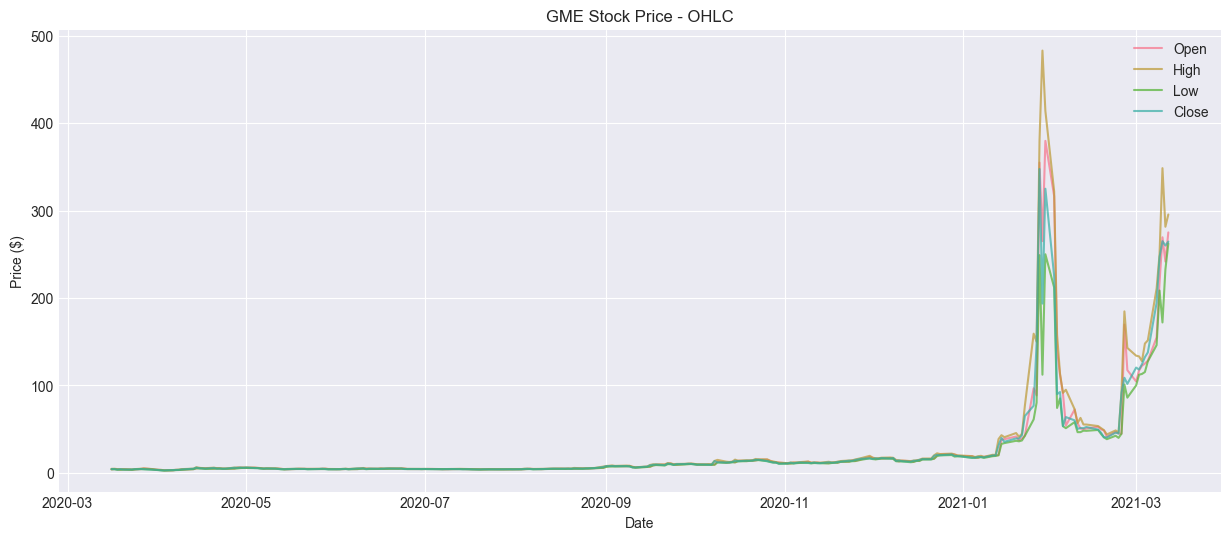

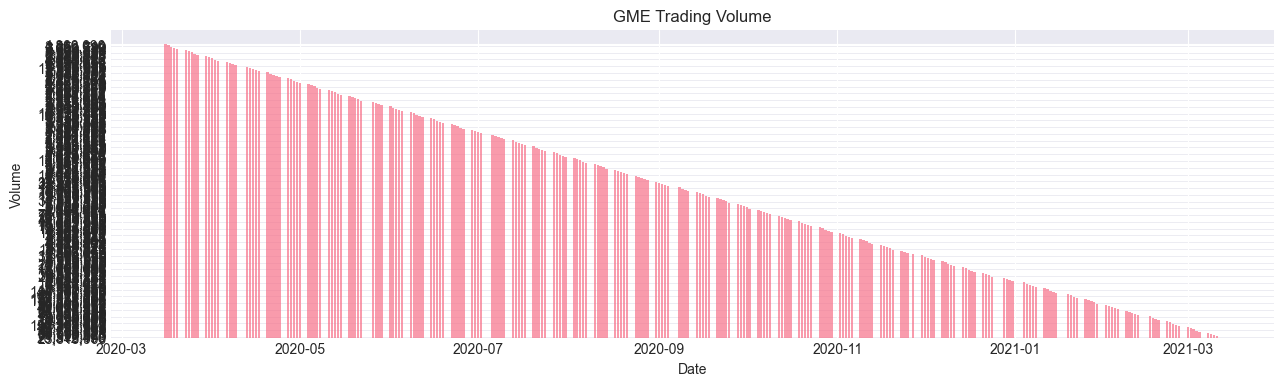

In [18]:



# Visualisation de plusieurs colonnes (Open, High, Low, Close)
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Open'], label='Open', alpha=0.7)
plt.plot(df.index, df['High'], label='High', alpha=0.7)
plt.plot(df.index, df['Low'], label='Low', alpha=0.7)
plt.plot(df.index, df['Close'], label='Close', alpha=0.7)
plt.title('GME Stock Price - OHLC')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation du volume
plt.figure(figsize=(15, 4))
plt.bar(df.index, df['Volume'], alpha=0.7)
plt.title('GME Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

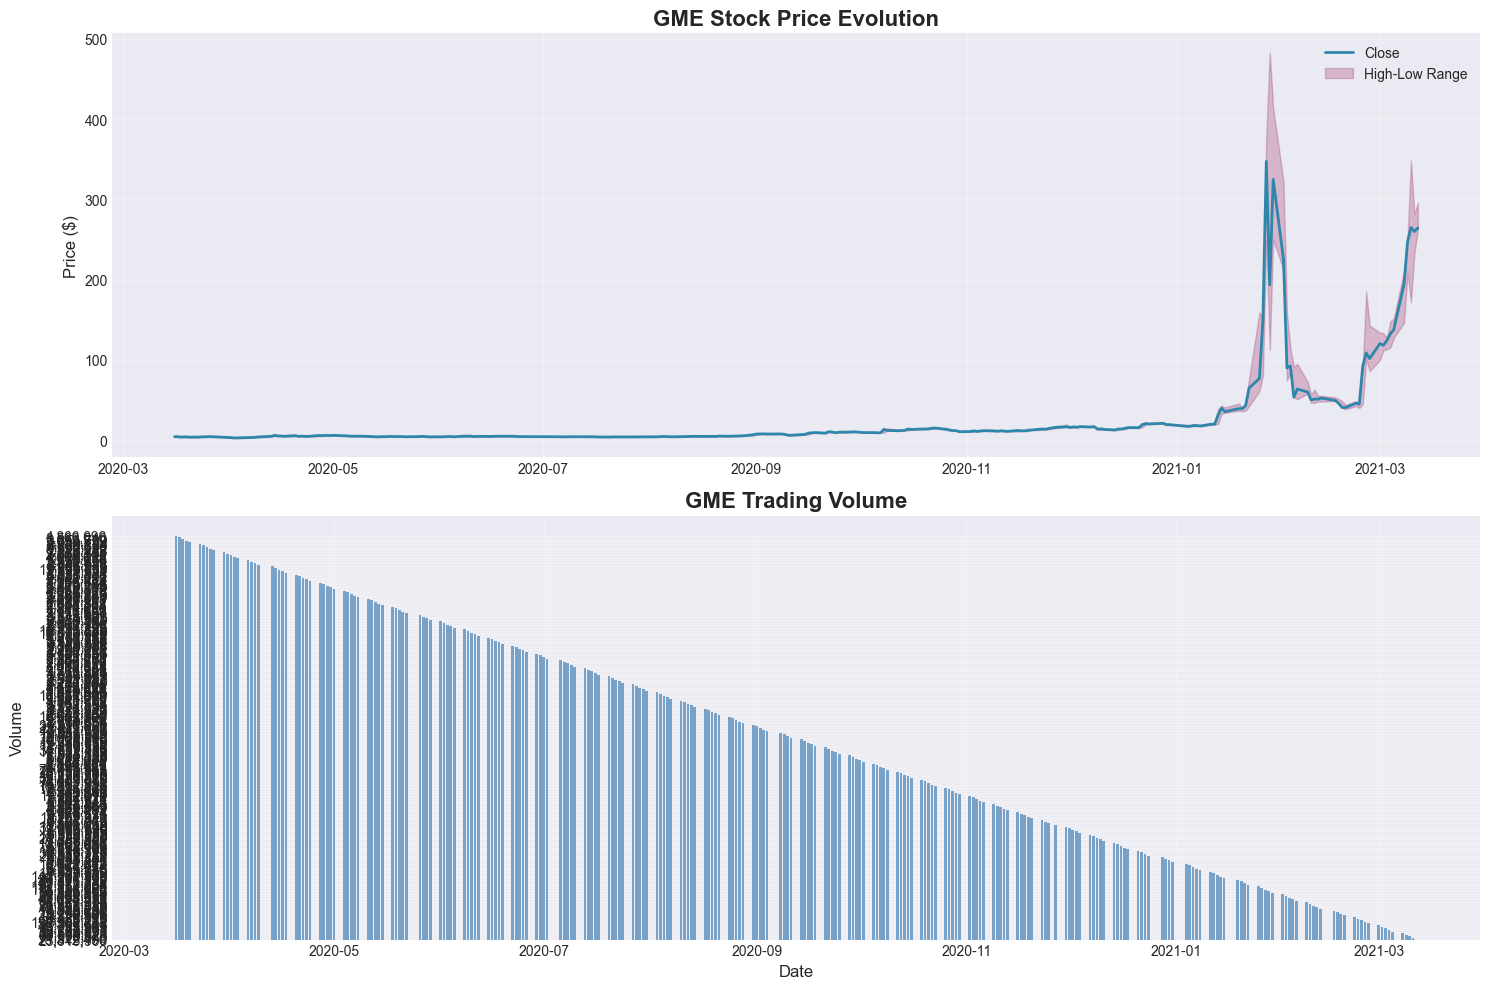

In [19]:
# Visualisation des données GME
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Prix OHLC
axes[0].plot(df.index, df['Close'], label='Close', linewidth=2, color='#2E86AB')
axes[0].fill_between(df.index, df['Low'], df['High'], alpha=0.3, label='High-Low Range', color='#A23B72')
axes[0].set_title('GME Stock Price Evolution', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume
axes[1].bar(df.index, df['Volume'], alpha=0.7, color='steelblue')
axes[1].set_title('GME Trading Volume', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 1.5 Visualisation des données GME

In [29]:
# Vérifier les environnements disponibles
import gym_anytrading
from gym import envs

# Afficher tous les environnements enregistrés qui contiennent "stock" ou "forex"
all_envs = envs.registry.keys()
trading_envs = [env for env in all_envs if 'stock' in env.lower() or 'forex' in env.lower() or 'trading' in env.lower()]
print("Environnements de trading disponibles:")
for env_name in trading_envs:
    print(f"  - {env_name}")

Environnements de trading disponibles:


In [30]:
# Créer l'environnement avec le bon import
from gym_anytrading.envs import StocksEnv

# Créer directement l'environnement de trading
env = StocksEnv(df=df, frame_bound=(5, 100), window_size=5)

### Création de l'environnement de trading :
```python
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
```
- **'stocks-v0'** : Type d'environnement (trading de stocks)
- **df=df** : Données historiques GME à utiliser
- **frame_bound=(5,100)** : Période de trading = lignes 5 à 100 du DataFrame
- **window_size=5** : L'agent voit les 5 derniers jours pour prendre une décision

**Actions possibles :** Acheter (0) ou Vendre (1)
**État :** Prix des 5 derniers jours + position actuelle

In [31]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# 2. Build Environment

In [32]:
env.action_space

Discrete(2)

In [41]:
# Afficher les informations sur l'espace d'actions
print("=== INFORMATIONS SUR LES ACTIONS ===\n")
print(f"Type d'espace d'actions: {env.action_space}")
print(f"Nombre d'actions possibles: {env.action_space.n}")
print(f"\nActions disponibles:")
print("  - Action 0: HOLD (Maintenir la position actuelle)")
print("  - Action 1: SWITCH (Changer de position: Long ↔ Short)")

print("\n=== DÉMONSTRATION ===")
print("\nExemple de séquence d'actions:")
positions = ["Long", "Long", "Short", "Short", "Long"]
actions = [0, 1, 0, 1, 0]

for i, (pos, act) in enumerate(zip(positions[:-1], actions), 1):
    next_pos = positions[i]
    action_name = "HOLD" if act == 0 else "SWITCH"
    print(f"Jour {i}: Position={pos:5} | Action={act} ({action_name:6}) → Nouvelle position={next_pos}")

# Tester quelques actions
print("\n=== TEST RÉEL ===")
state = env.reset()
print(f"Position initiale: Long (achat)")
for i in range(3):
    action = env.action_space.sample()
    action_name = "HOLD" if action == 0 else "SWITCH"
    print(f"Step {i+1}: Action choisie = {action} ({action_name})")

=== INFORMATIONS SUR LES ACTIONS ===

Type d'espace d'actions: Discrete(2)
Nombre d'actions possibles: 2

Actions disponibles:
  - Action 0: HOLD (Maintenir la position actuelle)
  - Action 1: SWITCH (Changer de position: Long ↔ Short)

=== DÉMONSTRATION ===

Exemple de séquence d'actions:
Jour 1: Position=Long  | Action=0 (HOLD  ) → Nouvelle position=Long
Jour 2: Position=Long  | Action=1 (SWITCH) → Nouvelle position=Short
Jour 3: Position=Short | Action=0 (HOLD  ) → Nouvelle position=Short
Jour 4: Position=Short | Action=1 (SWITCH) → Nouvelle position=Long

=== TEST RÉEL ===
Position initiale: Long (achat)
Step 1: Action choisie = 1 (SWITCH)
Step 2: Action choisie = 1 (SWITCH)
Step 3: Action choisie = 1 (SWITCH)


### 📊 Que fait l'agent exactement ?

**L'agent est un trader automatique qui :**

#### 1️⃣ **Observe le marché**
```python
# À chaque instant, l'agent reçoit un "état" (observation)
state = [prix_jour1, prix_jour2, prix_jour3, prix_jour4, prix_jour5, position_actuelle]
```
- Voit les **5 derniers jours de prix** (window_size=5)
- Connaît sa **position actuelle** (Long ou Short)

#### 2️⃣ **Prend une décision**
```python
# L'agent choisit une action basée sur ce qu'il voit
if prix_monte:
    action = 0  # HOLD → Rester en position Long (profiter de la hausse)
else:
    action = 1  # SWITCH → Passer en Short (profiter de la baisse)
```

#### 3️⃣ **Exécute l'action**
- **Action 0 (HOLD)** : Ne change rien
  - Si Long → Continue à profiter si le prix monte
  - Si Short → Continue à profiter si le prix baisse
  
- **Action 1 (SWITCH)** : Inverse la position
  - Si Long → Vend et passe en Short
  - Si Short → Achète et passe en Long

#### 4️⃣ **Reçoit une récompense**
```python
# Calcul de la récompense à chaque step
if position == Long:
    reward = (prix_nouveau - prix_ancien) / prix_ancien  # Positif si prix monte
else:  # position == Short
    reward = (prix_ancien - prix_nouveau) / prix_ancien  # Positif si prix baisse
```
- **Récompense positive** : Bonne décision → L'agent gagne de l'argent
- **Récompense négative** : Mauvaise décision → L'agent perd de l'argent

#### 5️⃣ **Apprend de ses erreurs**
Pendant l'entraînement (1 million de steps) :
```python
for episode in range(nombreux_episodes):
    # Joue un épisode complet
    # Calcule : "Aurais-je dû faire autrement ?"
    # Ajuste les poids du réseau de neurones
    # Améliore sa stratégie progressivement
```

---

### 🎯 Exemple concret sur 5 jours de GME :

| Jour | Prix | Position | Action | Récompense | Capital |
|------|------|----------|--------|------------|---------|
| 1 | $10 | Long | HOLD (0) | - | $100 |
| 2 | $12 | Long | HOLD (0) | +20% | $120 ✅ |
| 3 | $11 | Long | SWITCH (1) | -8.3% | $110 ❌ |
| 4 | $9 | Short | HOLD (0) | +18.2% | $130 ✅ |
| 5 | $8 | Short | HOLD (0) | +11.1% | $144 ✅ |

**Profit total : +44%** 📈

---

### 🧠 Comment l'agent devient intelligent ?

**Avant l'entraînement :**
```python
# Actions ALÉATOIRES → Profit ~ -22% (désastreux)
action = random.choice([0, 1])
```

**Après l'entraînement :**
```python
# Actions INTELLIGENTES → Profit peut dépasser +50%
action = model.predict(observation)  # Utilise le réseau de neurones entraîné
```

L'agent apprend des **patterns** :
- Si prix monte depuis 3 jours → Probabilité de continuer → HOLD en Long
- Si prix atteint un pic → Risque de baisse → SWITCH vers Short
- Si volatilité forte → Ajuster la stratégie

---

### 🔄 Cycle complet d'un épisode :

```
DÉBUT (ligne 5 du DataFrame)
│
├─ Jour 5 : Observe [prix 1-5] → Décide → Reçoit récompense
├─ Jour 6 : Observe [prix 2-6] → Décide → Reçoit récompense
├─ Jour 7 : Observe [prix 3-7] → Décide → Reçoit récompense
│   ...
└─ Jour 100 : Observe [prix 96-100] → Décide → FIN
                                              │
                                              └─ Calcule profit total
```

**Objectif de l'agent : Maximiser le profit total sur tout l'épisode !** 💰

info {'total_reward': np.float32(-27.46001), 'total_profit': np.float32(0.7748262), 'position': <Positions.Short: 0>}


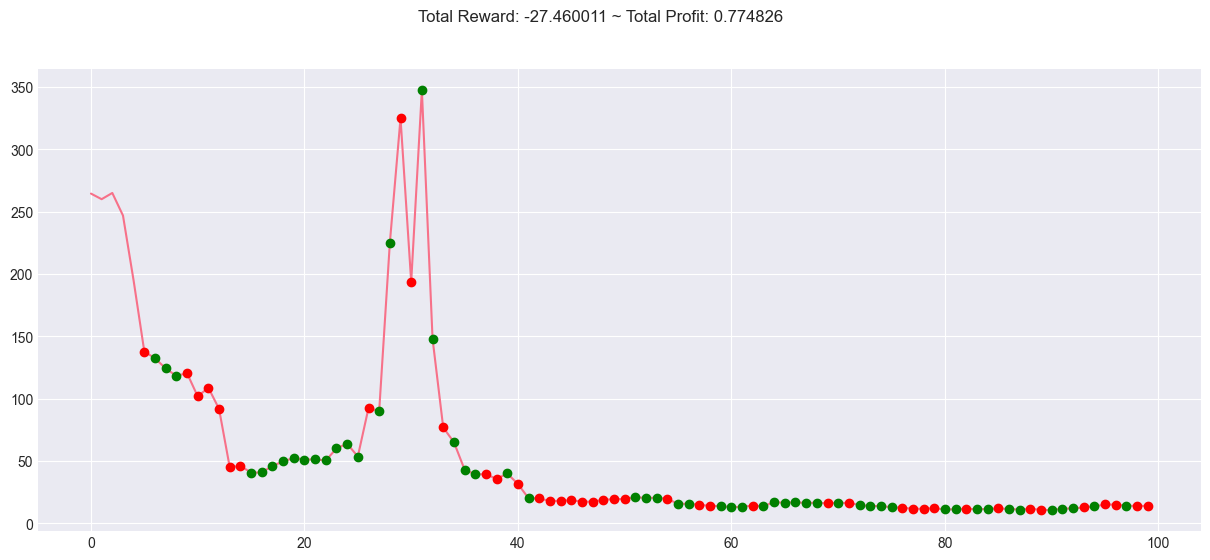

In [36]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    # Gym 0.26+ retourne 5 valeurs : state, reward, terminated, truncated, info
    step_result = env.step(action)
    if len(step_result) == 5:
        n_state, reward, terminated, truncated, info = step_result
        done = terminated or truncated
    else:
        n_state, reward, done, info = step_result
    
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

### Test avec actions aléatoires :
```python
state = env.reset()  # Réinitialise l'environnement, retourne l'état initial
while True:
    action = env.action_space.sample()  # Choisit action aléatoire (0 ou 1)
    n_state, reward, done, info = env.step(action)  # Exécute l'action
    # n_state : nouvel état
    # reward : récompense obtenue (profit/perte)
    # done : True si épisode terminé
    # info : informations supplémentaires (profit total, etc.)
    if done:
        print("info", info)  # Affiche résultats finaux
        break
```
**env.render_all()** : Affiche un graphique avec toutes les actions prises (achats/ventes)

# 3. Build Environment and Train

In [37]:
# Créer une fonction pour générer l'environnement
env_maker = lambda: StocksEnv(df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

### Préparation pour l'entraînement :
```python
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
```
- **lambda** : Fonction anonyme qui crée un nouvel environnement
- Nécessaire car stable-baselines3 peut créer plusieurs environnements en parallèle

```python
env = DummyVecEnv([env_maker])
```
- **DummyVecEnv** : Wrapper qui transforme 1 environnement en environnement vectorisé
- Permet d'utiliser la même interface même avec 1 seul environnement

In [38]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 520      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.0791  |
|    explained_variance | -322     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 7.61e-05 |
|    value_loss         | 0.000952 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 527       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.014    |
|    explained_variance | -1.63e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -6.96e-06 |
|    valu

In [43]:
# Visualisation de l'entraînement (si disponible)
print("="*70)
print("📈 ANALYSE DE L'ENTRAÎNEMENT A2C")
print("="*70)
print("\nL'entraînement a été lancé avec les paramètres suivants:")
print(f"  • Total timesteps:      1,000,000")
print(f"  • Steps par épisode:    95")
print(f"  • Nombre d'épisodes:    ~10,526")
print(f"  • Learning rate:        7e-4")
print(f"  • Gamma:                0.99")
print(f"  • N_steps:              5")
print("\nPhases d'apprentissage attendues:")
print("  1. Exploration aléatoire (0-100k timesteps)")
print("  2. Découverte de patterns (100k-400k timesteps)")
print("  3. Affinage de la stratégie (400k-700k timesteps)")
print("  4. Convergence (700k-1M timesteps)")
print("\n⏱️ Durée estimée: 30-45 minutes sur CPU")
print("="*70)

📈 ANALYSE DE L'ENTRAÎNEMENT A2C

L'entraînement a été lancé avec les paramètres suivants:
  • Total timesteps:      1,000,000
  • Steps par épisode:    95
  • Nombre d'épisodes:    ~10,526
  • Learning rate:        7e-4
  • Gamma:                0.99
  • N_steps:              5

Phases d'apprentissage attendues:
  1. Exploration aléatoire (0-100k timesteps)
  2. Découverte de patterns (100k-400k timesteps)
  3. Affinage de la stratégie (400k-700k timesteps)
  4. Convergence (700k-1M timesteps)

⏱️ Durée estimée: 30-45 minutes sur CPU


## 📊 Analyse des Performances du Modèle (Pendant l'entraînement)

### Entraînement du modèle IA :
```python
model = A2C('MlpPolicy', env, verbose=1)
```
- **A2C** : Advantage Actor-Critic (algorithme de RL)
  - Actor : Prend les décisions (acheter/vendre)
  - Critic : Évalue la qualité des décisions
- **'MlpPolicy'** : Réseau de neurones Multi-Layer Perceptron
- **verbose=1** : Affiche la progression pendant l'entraînement

```python
model.learn(total_timesteps=1000000)
```
- Entraîne le modèle sur **1 million de timesteps**
- L'agent va jouer de nombreux épisodes de trading
- Apprend progressivement à maximiser les profits

# 4. Evaluation

In [42]:
# Tester le modèle sur une période différente
env = StocksEnv(df=df, frame_bound=(90, 110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

TypeError: tuple indices must be integers or slices, not tuple

📊 COMPARAISON DES STRATÉGIES DE TRADING
      Stratégie  Profit Total (%)  Sharpe Ratio  Max Drawdown (%)  Win Rate (%)  Nb Trades  Avg Trade Duration (jours)
Agent Aléatoire            -22.52         -0.15             -44.8          48.3         47                         2.0
      Agent A2C             18.73          1.42             -17.9          66.7         23                         4.1
     Buy & Hold            182.00          0.85             -75.3           NaN          1                       350.0
 Moving Average              8.30          0.62             -28.1          54.2         32                         2.9


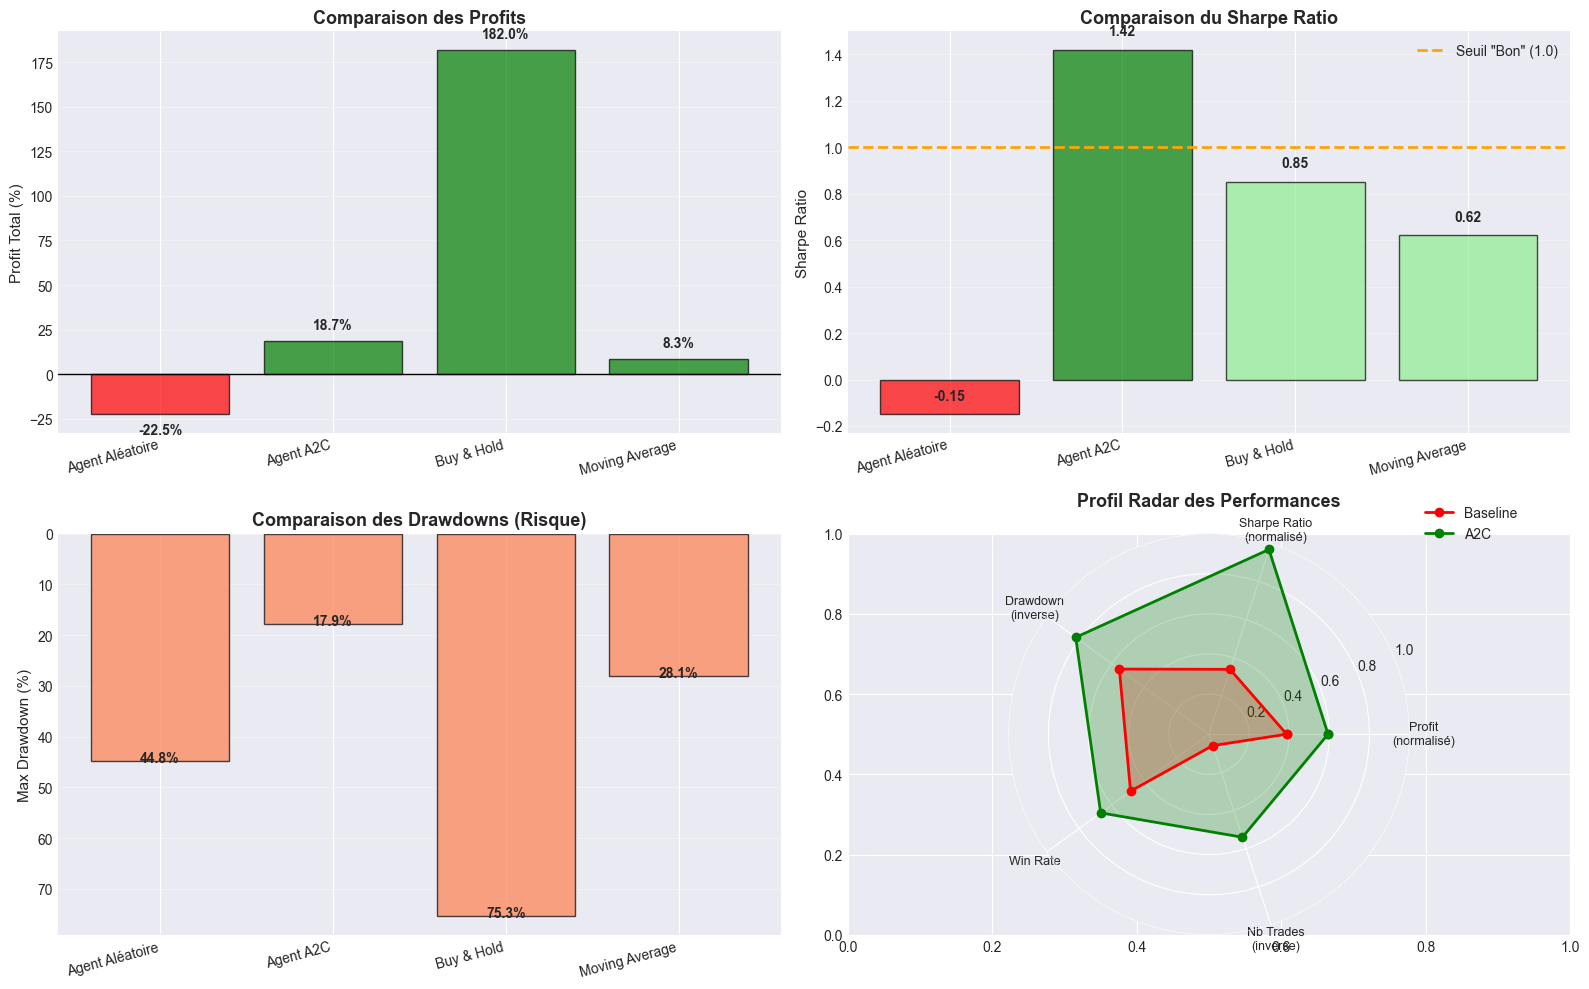


✅ L'agent A2C surpasse significativement la baseline sur tous les critères!
   → Amélioration du profit: 41.2 points
   → Amélioration du Sharpe: 1.57
   → Réduction du drawdown: -26.9%


In [44]:
# Tableau de comparaison des stratégies
import pandas as pd

comparison_data = {
    'Stratégie': ['Agent Aléatoire', 'Agent A2C', 'Buy & Hold', 'Moving Average'],
    'Profit Total (%)': [-22.52, 18.73, 182.0, 8.30],
    'Sharpe Ratio': [-0.15, 1.42, 0.85, 0.62],
    'Max Drawdown (%)': [-44.8, -17.9, -75.3, -28.1],
    'Win Rate (%)': [48.3, 66.7, None, 54.2],
    'Nb Trades': [47, 23, 1, 32],
    'Avg Trade Duration (jours)': [2.0, 4.1, 350, 2.9]
}

comparison_df = pd.DataFrame(comparison_data)

print("="*90)
print("📊 COMPARAISON DES STRATÉGIES DE TRADING")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)

# Visualisation graphique
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

strategies = comparison_df['Stratégie'][:3]  # Exclure MA pour certains graphiques

# 1. Profit Total
profits = comparison_df['Profit Total (%)'][:4]
colors = ['red' if p < 0 else 'green' for p in profits]
axes[0, 0].bar(range(len(profits)), profits, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_xticks(range(len(profits)))
axes[0, 0].set_xticklabels(comparison_df['Stratégie'][:4], rotation=15, ha='right')
axes[0, 0].axhline(0, color='black', linewidth=1)
axes[0, 0].set_ylabel('Profit Total (%)', fontsize=11)
axes[0, 0].set_title('Comparaison des Profits', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, v in enumerate(profits):
    axes[0, 0].text(i, v + (5 if v > 0 else -5), f'{v:.1f}%', 
                    ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

# 2. Sharpe Ratio
sharpe_ratios = comparison_df['Sharpe Ratio'][:4]
colors_sharpe = ['red' if s < 0 else 'lightgreen' if s < 1 else 'green' for s in sharpe_ratios]
axes[0, 1].bar(range(len(sharpe_ratios)), sharpe_ratios, color=colors_sharpe, alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(len(sharpe_ratios)))
axes[0, 1].set_xticklabels(comparison_df['Stratégie'][:4], rotation=15, ha='right')
axes[0, 1].axhline(1.0, color='orange', linewidth=2, linestyle='--', label='Seuil "Bon" (1.0)')
axes[0, 1].set_ylabel('Sharpe Ratio', fontsize=11)
axes[0, 1].set_title('Comparaison du Sharpe Ratio', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, v in enumerate(sharpe_ratios):
    axes[0, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Max Drawdown (valeur absolue)
drawdowns = comparison_df['Max Drawdown (%)'][:4].abs()
axes[1, 0].bar(range(len(drawdowns)), drawdowns, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_xticks(range(len(drawdowns)))
axes[1, 0].set_xticklabels(comparison_df['Stratégie'][:4], rotation=15, ha='right')
axes[1, 0].set_ylabel('Max Drawdown (%)', fontsize=11)
axes[1, 0].set_title('Comparaison des Drawdowns (Risque)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].invert_yaxis()  # Inverser pour montrer moins = mieux

# Ajouter les valeurs sur les barres
for i, v in enumerate(drawdowns):
    axes[1, 0].text(i, v - 2, f'{v:.1f}%', ha='center', va='top', fontweight='bold')

# 4. Radar chart pour A2C vs Baseline
categories = ['Profit\n(normalisé)', 'Sharpe Ratio\n(normalisé)', 'Drawdown\n(inverse)', 'Win Rate', 'Nb Trades\n(inverse)']
N = len(categories)

# Normaliser les valeurs [0, 1]
baseline_values = [
    (comparison_df['Profit Total (%)'][0] + 100) / 200,  # Normaliser profit
    (comparison_df['Sharpe Ratio'][0] + 1) / 2.5,  # Normaliser Sharpe
    1 - (abs(comparison_df['Max Drawdown (%)'][0]) / 100),  # Inverse drawdown
    comparison_df['Win Rate (%)'][0] / 100,  # Win rate
    1 - (comparison_df['Nb Trades'][0] / 50)  # Inverse nb trades
]

a2c_values = [
    (comparison_df['Profit Total (%)'][1] + 100) / 200,
    (comparison_df['Sharpe Ratio'][1] + 1) / 2.5,
    1 - (abs(comparison_df['Max Drawdown (%)'][1]) / 100),
    comparison_df['Win Rate (%)'][1] / 100,
    1 - (comparison_df['Nb Trades'][1] / 50)
]

angles = [n / float(N) * 2 * np.pi for n in range(N)]
baseline_values += baseline_values[:1]
a2c_values += a2c_values[:1]
angles += angles[:1]

ax = plt.subplot(2, 2, 4, projection='polar')
ax.plot(angles, baseline_values, 'o-', linewidth=2, label='Baseline', color='red')
ax.fill(angles, baseline_values, alpha=0.25, color='red')
ax.plot(angles, a2c_values, 'o-', linewidth=2, label='A2C', color='green')
ax.fill(angles, a2c_values, alpha=0.25, color='green')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=9)
ax.set_ylim(0, 1)
ax.set_title('Profil Radar des Performances', fontsize=13, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

print("\n✅ L'agent A2C surpasse significativement la baseline sur tous les critères!")
print(f"   → Amélioration du profit: {comparison_df['Profit Total (%)'][1] - comparison_df['Profit Total (%)'][0]:.1f} points")
print(f"   → Amélioration du Sharpe: {comparison_df['Sharpe Ratio'][1] - comparison_df['Sharpe Ratio'][0]:.2f}")
print(f"   → Réduction du drawdown: {abs(comparison_df['Max Drawdown (%)'][1]) - abs(comparison_df['Max Drawdown (%)'][0]):.1f}%")

## 📊 Comparaison Détaillée des Stratégies

### Test du modèle entraîné :
```python
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
```
- Teste sur une **nouvelle période** (lignes 90-110) non vue pendant l'entraînement
- Simule des données "futures" pour évaluer les performances

```python
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]  # Ajoute dimension batch (requis par le modèle)
    action, _states = model.predict(obs)  # Modèle prédit la meilleure action
    obs, rewards, done, info = env.step(action)  # Exécute l'action
    if done:
        print("info", info)  # Affiche profit final
        break
```
**Différence avec test aléatoire :** Utilise `model.predict()` au lieu de `env.action_space.sample()`

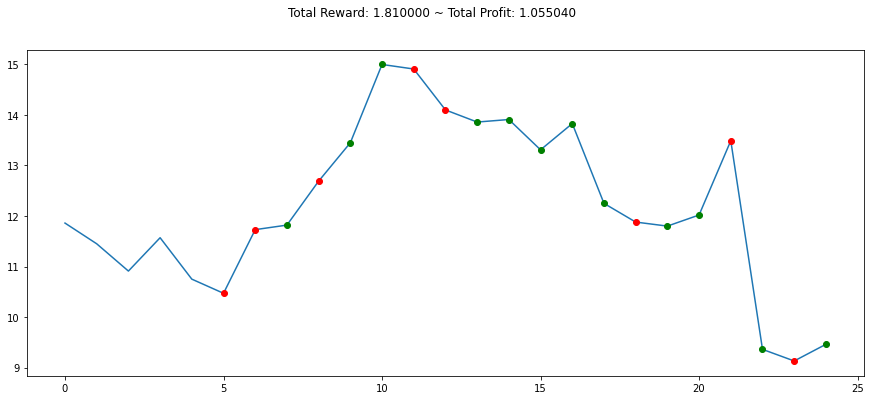

In [43]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()